# Importing the libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
plt.style.use('seaborn-whitegrid')
import math, time, random, datetime

# Importing the Dataset 

In [2]:
training = pd.read_csv('train.csv')

In [3]:
training

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [48]:
test = pd.read_csv('test.csv')

In [49]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,NaN
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,NaN


# Visualizing the missing data 

<AxesSubplot:>

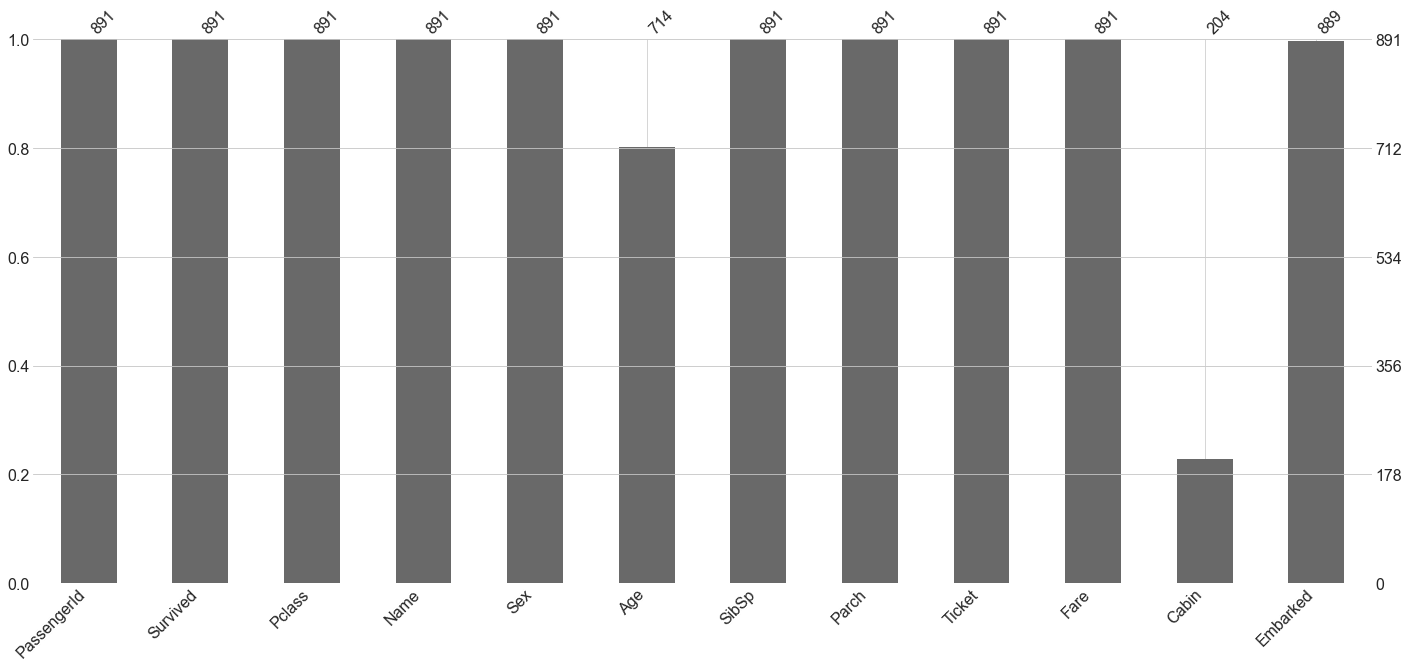

In [5]:
import missingno as msno
msno.bar(training)

<AxesSubplot:>

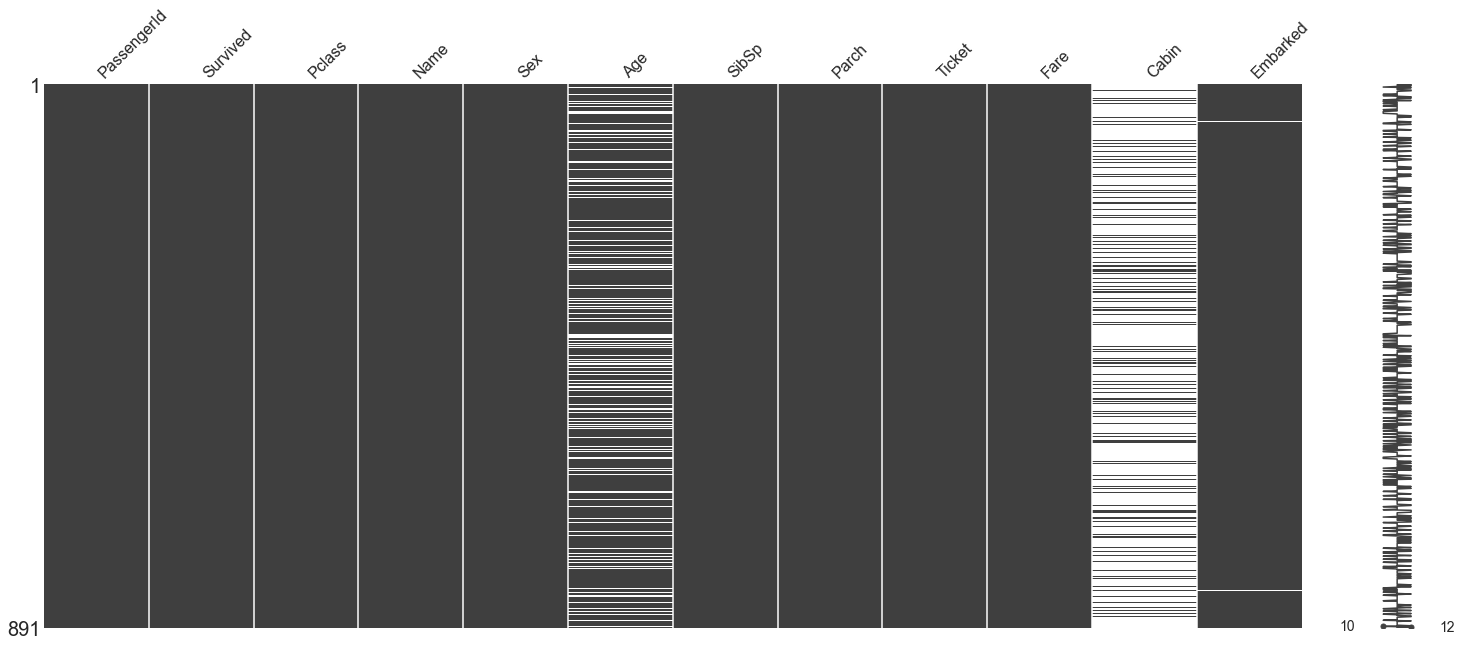

In [7]:
msno.matrix(training)

<AxesSubplot:>

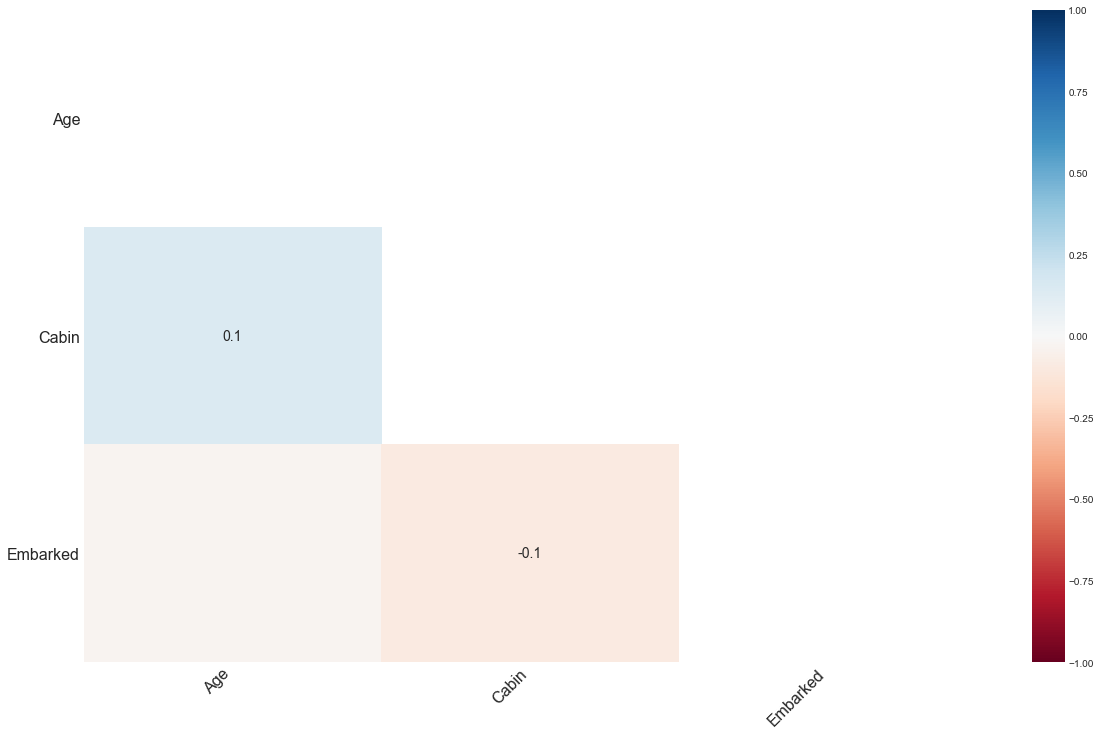

In [13]:
msno.heatmap(training)

# We can see that age and Cabin column are having lot of missing values 

<AxesSubplot:>

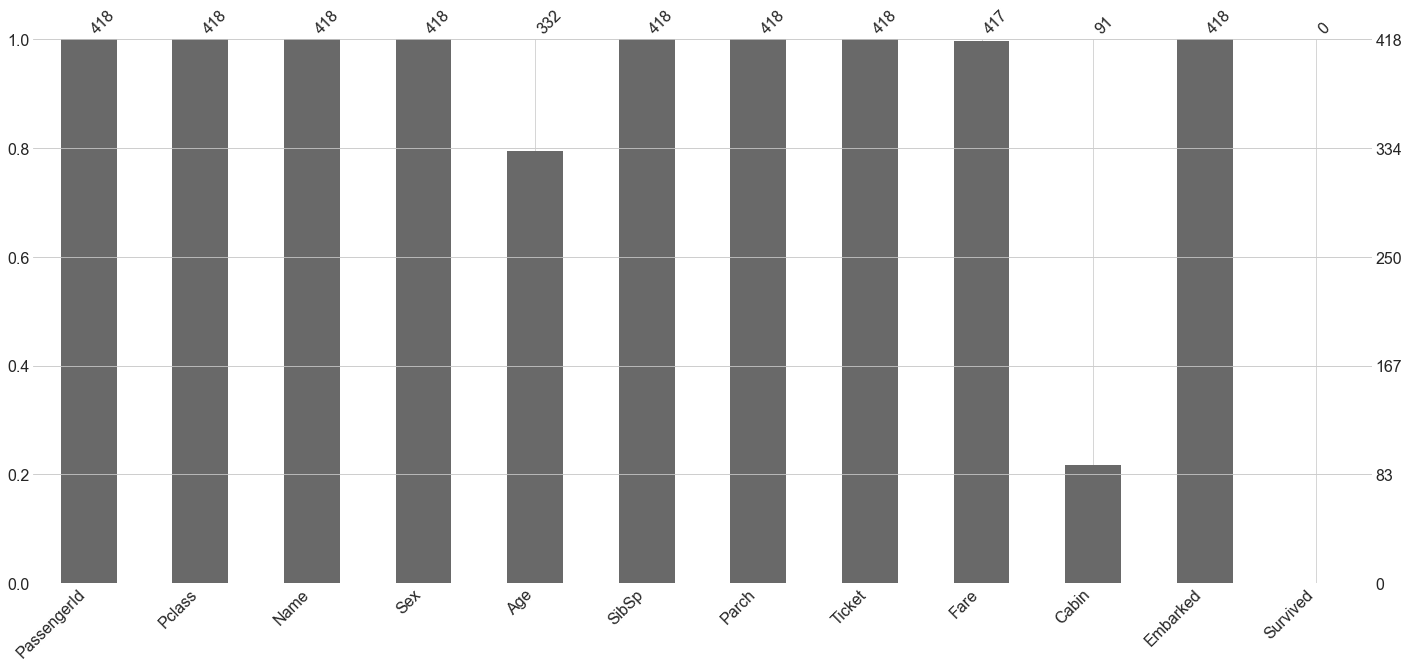

In [10]:
import missingno as msno
msno.bar(test)

<AxesSubplot:>

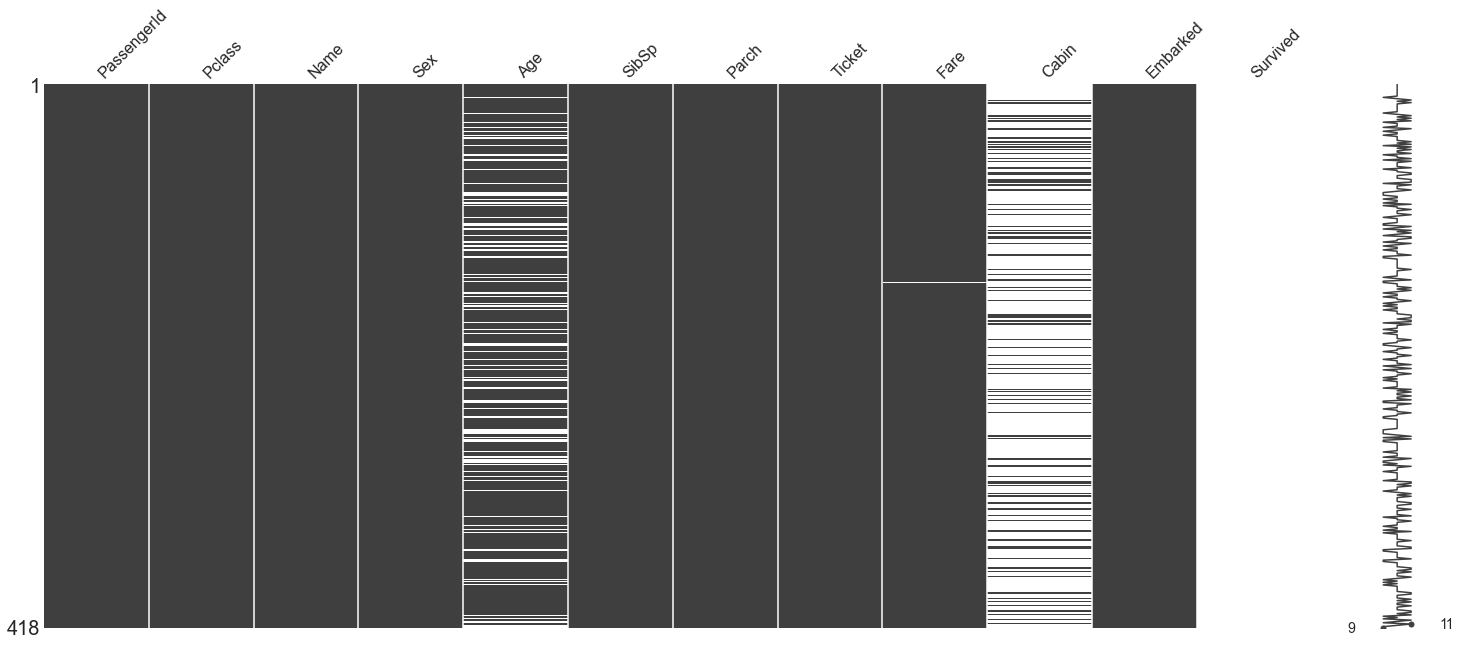

In [12]:
msno.matrix(test)

<AxesSubplot:>

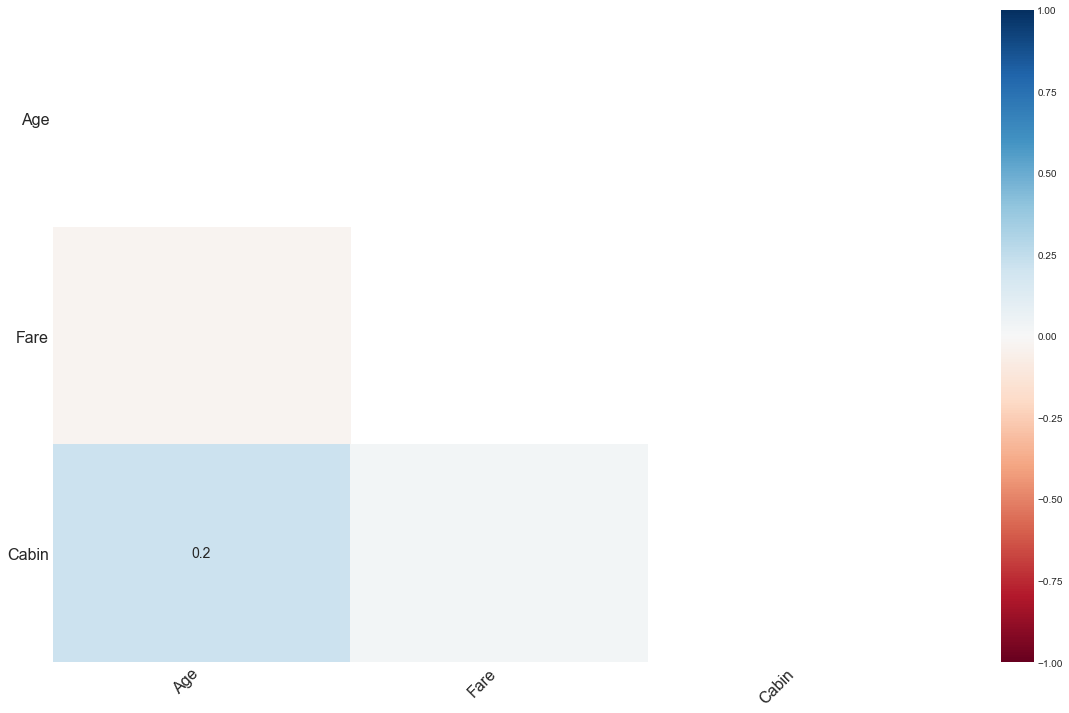

In [14]:
msno.heatmap(test)

# Visualizing Survival Data 

<AxesSubplot:xlabel='Survived', ylabel='count'>

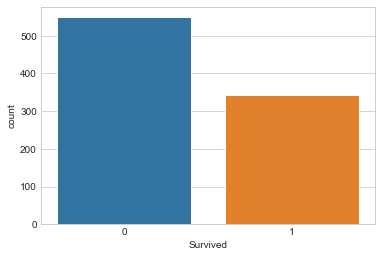

In [15]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = training)

# Visualizing the data survival with respect to Sex

<AxesSubplot:xlabel='Survived', ylabel='count'>

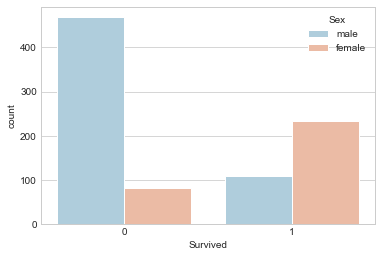

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue = 'Sex', data = training, palette = 'RdBu_r')

# Visualizing the data of Survivals with respect to PClass i.e. how many survivals are there in 1,2,3 PClasses

<AxesSubplot:xlabel='Survived', ylabel='count'>

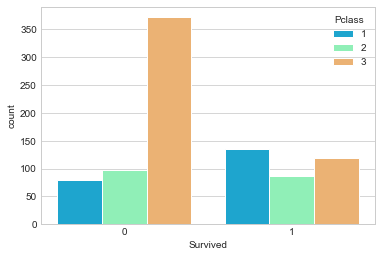

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data = training, palette = 'rainbow')

# Visualizing Pclass vs Age

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

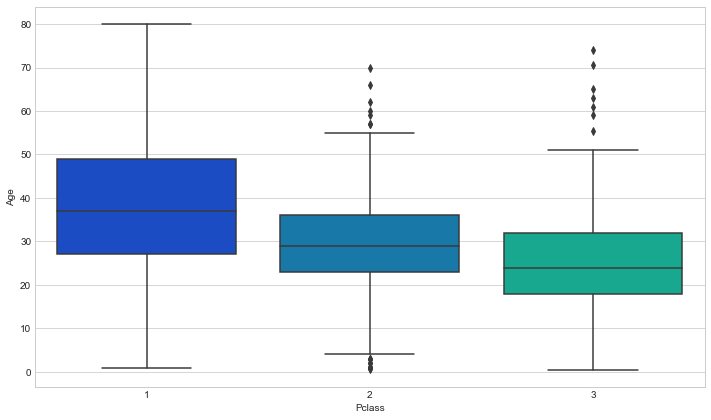

In [18]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y = 'Age', data = training, palette = 'winter')

## Here average age Pclass - 1 = 37, Average age of Pclass - 2 = 28, Average Age of Pclass - 3 = 24, these averages will be hepful
## in filling the missing values in Age columns 

# Handling missing values 

In [50]:
training.isna().sum()

PassengerId    0
Sex            0
Embarked       0
Pclass         0
Age            0
SibSp          0
Survived       0
dtype: int64

In [51]:
X_test = test
X_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived       418
dtype: int64

## Taking dependable variable column i.e. Survived on the extreme right of the data and ignoring other columns like : PassengerId, Fare, Cabin,Parch, from the data

In [52]:
training = training[['PassengerId','Sex','Embarked','Pclass','Age','SibSp','Survived']]

In [53]:
training

,PassengerId,Sex,Embarked,Pclass,Age,SibSp,Survived
0,1,male,S,3,22.0,1,0
1,2,female,C,1,38.0,1,1
2,3,female,S,3,26.0,0,1
3,4,female,S,1,35.0,1,1
4,5,male,S,3,35.0,0,0
...,...,...,...,...,...,...,...
886,887,male,S,2,27.0,0,0
887,888,female,S,1,19.0,0,1
888,889,female,S,3,24.0,1,0
889,890,male,C,1,26.0,0,1


## Now we have 177 NaN in age and 2 NaN in Embarked column, We can ignore Embarked column NaN and drop them, but we can't ignore 
## Age column as it is critical for the data and also they are too many, therefore we can use the following :

In [54]:
# This will remove NaN values from Embarked Column 
training.dropna(subset = ["Embarked"], inplace=True)

In [24]:
training

,PassengerId,Sex,Embarked,Pclass,Age,SibSp,Survived
0,1,male,S,3,22.0,1,0
1,2,female,C,1,38.0,1,1
2,3,female,S,3,26.0,0,1
3,4,female,S,1,35.0,1,1
4,5,male,S,3,35.0,0,0
...,...,...,...,...,...,...,...
886,887,male,S,2,27.0,0,0
887,888,female,S,1,19.0,0,1
888,889,female,S,3,NaN,1,0
889,890,male,C,1,26.0,0,1


In [55]:
training.isna().sum()

PassengerId    0
Sex            0
Embarked       0
Pclass         0
Age            0
SibSp          0
Survived       0
dtype: int64

# Now we can fill the Age missing vlaues with mean values of PClasses

In [56]:
# To replace NaN values in age column we can use the following function : 
def average_age(cols):  # Function name : average_age
    Age =cols[0]
    Pclass =cols[1]
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 28
        else:
            return 24
    else: 
        return Age 

In [57]:
X_test['Age']= X_test[['Age','Pclass']].apply(average_age, axis = 1)

In [58]:
training['Age']= training[['Age','Pclass']].apply(average_age, axis = 1)

In [30]:
training

,PassengerId,Sex,Embarked,Pclass,Age,SibSp,Survived
0,1,male,S,3,22.0,1,0
1,2,female,C,1,38.0,1,1
2,3,female,S,3,26.0,0,1
3,4,female,S,1,35.0,1,1
4,5,male,S,3,35.0,0,0
...,...,...,...,...,...,...,...
886,887,male,S,2,27.0,0,0
887,888,female,S,1,19.0,0,1
888,889,female,S,3,24.0,1,0
889,890,male,C,1,26.0,0,1


In [31]:
training.isna().sum()

PassengerId    0
Sex            0
Embarked       0
Pclass         0
Age            0
SibSp          0
Survived       0
dtype: int64

In [59]:
X_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived       418
dtype: int64

In [60]:
X_test = X_test[['PassengerId','Sex','Embarked','Pclass','Age','SibSp']] # Dropping the Cabin Column and Fare column

In [61]:
X_test

,PassengerId,Sex,Embarked,Pclass,Age,SibSp
0,892,male,Q,3,34.5,0
1,893,female,S,3,47.0,1
2,894,male,Q,2,62.0,0
3,895,male,S,3,27.0,0
4,896,female,S,3,22.0,1
...,...,...,...,...,...,...
413,1305,male,S,3,24.0,0
414,1306,female,C,1,39.0,0
415,1307,male,S,3,38.5,0
416,1308,male,S,3,24.0,0


In [62]:
X_test.isna().sum()

PassengerId    0
Sex            0
Embarked       0
Pclass         0
Age            0
SibSp          0
dtype: int64

# BREAKING DATA SET INTO DEPENDTABLE AND INDEPENDENDENT VARIABLE COLUMNS

In [63]:
X = training.iloc[:, :-1]
y = training.iloc[:, -1]

In [64]:
X

,PassengerId,Sex,Embarked,Pclass,Age,SibSp
0,1,male,S,3,22.0,1
1,2,female,C,1,38.0,1
2,3,female,S,3,26.0,0
3,4,female,S,1,35.0,1
4,5,male,S,3,35.0,0
...,...,...,...,...,...,...
886,887,male,S,2,27.0,0
887,888,female,S,1,19.0,0
888,889,female,S,3,24.0,1
889,890,male,C,1,26.0,0


# ENCODING THE CATEGORICAL DATA "SEX" & "EMBARKED" COLUMNS

In [65]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
ct = make_column_transformer((OneHotEncoder(), ['Sex', 'Embarked']), remainder = 'passthrough')
X_test = ct.fit_transform(X_test)

In [66]:
print(X_test)

[[ 0.   1.   0.  ...  3.  34.5  0. ]
 [ 1.   0.   0.  ...  3.  47.   1. ]
 [ 0.   1.   0.  ...  2.  62.   0. ]
 ...
 [ 0.   1.   0.  ...  3.  38.5  0. ]
 [ 0.   1.   0.  ...  3.  24.   0. ]
 [ 0.   1.   1.  ...  3.  24.   1. ]]


In [67]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
ct = make_column_transformer((OneHotEncoder(), ['Sex', 'Embarked']), remainder = 'passthrough')
X = ct.fit_transform(X)

In [68]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X_test=sc.fit_transform(X_test)

# PREDICTING MODEL USING LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'lbfgs')
logreg.fit(X,y) # fit he model
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X,y, cv=5, scoring ='accuracy').mean()

In [70]:
y_predict = logreg.predict(X_test)

In [71]:
y_predict

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,

# Validating the accuracy of the Model 

In [72]:
cross_val_score(logreg, X_test,y_predict, cv=5, scoring ='accuracy').mean()

0.9640849110728629

# Creating submission file for Kaggle in which PassengerId and Survived Column will be there 

In [73]:
submission = pd.DataFrame()
submission['PassengerId']=test['PassengerId']
submission['Survived']=y_predict
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,0
4,896,1


In [74]:
submission.to_csv('titanic_prediction.csv')